# Arrays

## 1. Given an integer array nums, return true if any value appears at least twice in the array, and return false if every element is distinct.

 

Example 1:

Input: nums = [1,2,3,1]
Output: true
Example 2:

Input: nums = [1,2,3,4]
Output: false
Example 3:

Input: nums = [1,1,1,3,3,4,3,2,4,2]
Output: true

# Intuition

Brute force: We compare each and every item with other item and if it repeats we return True. Due to multi-check it 
requires O(n^2) time and 0(1) time
    
Mid level solution: To reduce time complexity we can go in only one direction for the checks. By sorting and then only 
checking in 1 direction. Time: O(nlogn) and space o(1)
    
Optimized Solution: We create a dictionary and add occurence as per each element. Then we iterate through each item of
list again and return true if the value of any key is more than 1

In [4]:
# Code:

class Solution(object):
    def containsDuplicate(self, nums):
        """
        :type nums: List[int]
        :rtype: bool
        """
        dict1 = {}
        for num in nums:
            if num in dict1:
                dict1[num] +=1
            else:
                dict1[num]=1
        
        for num in nums:
            if dict1[num]>1:
                return True
        return False
        


## 2.Given two strings s and t, return true if t is an anagram of s, and false otherwise.

An Anagram is a word or phrase formed by rearranging the letters of a different word or phrase, typically using all the original letters exactly once.

 

Example 1:

Input: s = "anagram", t = "nagaram"
Output: true
Example 2:

Input: s = "rat", t = "car"
Output: false
 

Constraints:

1 <= s.length, t.length <= 5 * 104
s and t consist of lowercase English letters.

## Intution

1. Dictionary: we can iterate through the strings, and create dictionary for each string as s and t. We will add letter and their occurences as key-value. Once dictionary is created, we compare both dictionaries with respect to key and value pair. If it is same we return True else False. As we compare 2 dictionary Time complexity is O(S+T) and space complexity is 2 dictionary space O(S+T)

2. Sorting: we can sort both string and then compare it as a boolean comparison. For sorting time complexity O(N)= nlogn and space complexity is O(!)

In [5]:
# Code

class Solution(object):
    def isAnagram(self, s, t):
        """
        :type s: str
        :type t: str
        :rtype: bool
        """
        return sorted(s)==sorted(t)
        

# 3. Given an array of integers nums and an integer target, return indices of the two numbers such that they add up to target.

You may assume that each input would have exactly one solution, and you may not use the same element twice.

You can return the answer in any order.

 

Example 1:

Input: nums = [2,7,11,15], target = 9
Output: [0,1]
Explanation: Because nums[0] + nums[1] == 9, we return [0, 1].
Example 2:

Input: nums = [3,2,4], target = 6
Output: [1,2]
Example 3:

Input: nums = [3,3], target = 6
Output: [0,1]

# Intuition

1. Brute force: We can iterate through each item of the list, calculate the diff with the target and check if that diff exist in the list. But we will check each number combination with other number combination so time complexity of this will be O(n^2). 

2. Hashmap: we will add the diff as the key and index of the current element as value. If the next number is present as a diff in the hashmap we will return the index of the next number and the value of the diff from the hashmap. The time complexity for each check is given by O(n) and space is occupied by hashmap so it can be upto all the elements of list so O(n)

In [1]:
# Code

class Solution(object):
    def twoSum(self, nums, target):
        """
        :type nums: List[int]
        :type target: int
        :rtype: List[int]
        """
        reference = {}
        for i,num in enumerate(nums):
            complement = target-num
            if num in reference:
                return [reference[num],i]
            else:
                reference[complement]=i
        

# 4. Given an array of strings strs, group the anagrams together. You can return the answer in any order.

An Anagram is a word or phrase formed by rearranging the letters of a different word or phrase, typically using all the original letters exactly once.

 

Example 1:

Input: strs = ["eat","tea","tan","ate","nat","bat"]
Output: [["bat"],["nat","tan"],["ate","eat","tea"]]
Example 2:

Input: strs = [""]
Output: [[""]]
Example 3:

Input: strs = ["a"]
Output: [["a"]]

# Intuition

Brute Force: we sort each string of the list. Then compare each sorted string and then return the equal string. But sorting time complexity is nlogn and we will try to do this for all the item of the list so time complexity will become O(m*nlogn) and we have to then compare the sorted strings as well. so it will add m^2 complexity. 

hashmap: we can store key- value pair as key: count of characters from a-z and value: strings having same count. for finding count we have to create a list of 26 indexes and increment 1 count as we encounter more count. Also list cannot be the key of dictionary so we convert it into a tuple. As we may face runtime error when we try to add value to the index which is not yet create, we initialize a default dict with list as the value datatype. We count character of each string and we do it for every string so time complexity is O(n*m)

In [3]:
# Code

class Solution(object):
    def groupAnagrams(self, strs):
        """
        :type strs: List[str]
        :rtype: List[List[str]]
        """
        res = defaultdict(list)

        for str in strs:
            count = [0] * 26
            for c in str:
                count[ord(c)-ord('a')]+=1
            res[tuple(count)].append(str)
        return res.values()
        

# 5. Given an integer array nums and an integer k, return the k most frequent elements. You may return the answer in any order.

 

Example 1:

Input: nums = [1,1,1,2,2,3], k = 2
Output: [1,2]
Example 2:

Input: nums = [1], k = 1
Output: [1]

# Intuition

1. Hashmap and Sorting: Iterate trough all the elements and create hashmaps where key is element and value is no of occurences. The sort the hashmap based on the values. Take out the k no of highest occuring element. The time complexit is nlogn as the sorting of entire values set is done. Space complexity is n

2. Hashmap and bucket Sort: Iterate through all elements and create hashmap as earlier. For sorting use the concept of bucket sort. Create an empty nested list where index is no of occurences and value is the list of numbers that occur 'index no of times'. The iterate reversely through this list. and keep adding the element simultaneously in output list. Once the output list becomes the size of k, return the output list. The time complexity will be O(n) as we iterate throudh the nested list onces and space complexit is n due to hashmap


In [20]:
def topKFrequent(nums, k):
        """
        :type nums: List[int]
        :type k: int
        :rtype: List[int]
        """
        freq = {}
        # Creating hashmap key:number value: occurences
        for num in nums:
            freq[num]= freq.get(num,0)+1
            
        # Creating a nested list where index is no of occurences and value is list of numbers that occur that much of time
        list1 = [[] for i in range(len(nums))]
        for key,values in freq.items():
            list1[values].append(key)
        
        # Creating output list by reverse traversal
        output = []
        for i in range(len(list1)-1,0,-1):
            for n in list1[i]:
                output.append(n)
                if len(output)==k:
                    return output
            
topKFrequent([1,1,1,2,2,2,3],2)

[1, 2]

# 6.Given an integer array nums, return an array answer such that answer[i] is equal to the product of all the elements of nums except nums[i].

The product of any prefix or suffix of nums is guaranteed to fit in a 32-bit integer.

You must write an algorithm that runs in O(n) time and without using the division operation.

 

Example 1:

Input: nums = [1,2,3,4]
Output: [24,12,8,6]
Example 2:

Input: nums = [-1,1,0,-3,3]
Output: [0,0,9,0,0]

# Intuition

1. Prefix postfix arrays: We create 2 arrays such that prefix will store the product of the numbers before the current index number in prefix array and the product of numbers after the current index number in postfix arrays. Then we multiply the previous prefix number and post postfix number to store in the output array.

2. Without additional arrays: We traverse once straight to create a prefix array. we initiate prefix variable with 1. We then replace the resultant array value with prefix. we keep updating prefix with the product of prefix and the input array. Once the prefix array is generated we traverse in reverse direction to create postfix arrray. We initiate postfix variabl with 1. we take product of postfix variable and prefix array and store in result array. we update postfix variable with product of postfix and input array. Output is found in input array

In [34]:
# Code


def productExceptSelf(nums):
        """
        :type nums: List[int]
        :rtype: List[int]
        """
        result = [1]*len(nums)
        print(nums)
        # Creating prefix array
        prefix=1
        for i in range(len(nums)):
            result[i] = prefix
            prefix*=nums[i]
        print(result)
            
        postfix = 1
        for i in range(len(nums)-1,-1,-1):
            result[i]=result[i]*postfix
            postfix*= nums[i]
            
        return result
        
productExceptSelf([1,2,3,4])

[1, 2, 3, 4]
[1, 1, 2, 6]


[24, 12, 8, 6]

# 7.Determine if a 9 x 9 Sudoku board is valid. Only the filled cells need to be validated according to the following rules:

Each row must contain the digits 1-9 without repetition.
Each column must contain the digits 1-9 without repetition.
Each of the nine 3 x 3 sub-boxes of the grid must contain the digits 1-9 without repetition.

# Intuition

1. We create 3 hashsets: 1st to hold the row elements,2nd to hold column elements and 3rd to hold subgrid elements. We check if the element to check is an "." then we pass that. 



In [12]:
# Code
import collections
def isValidSudoku(board):
        """
        :type board: List[List[str]]
        :rtype: bool
        """
        rows = collections.defaultdict(set)
        columns = collections.defaultdict(set)
        subgrid = collections.defaultdict(set)
        
        for r in range(9):
            for c in range(9):
                if (board[r][c]=="."):
                    continue
                if( board[r][c] in rows[r] or board[r][c] in columns[c] or board[r][c] in subgrid[(r//3,c//3)]):
                    return False
                rows[r].add(board[r][c])
                columns[c].add(board[r][c])
                subgrid[(r//3,c//3)].add(board[r][c])
        return True
board = [["5","3",".",".","7",".",".",".","."]
,["6",".",".","1","9","5",".",".","."]
,[".","9","8",".",".",".",".","6","."]
,["8",".",".",".","6",".",".",".","3"]
,["4",".",".","8",".","3",".",".","1"]
,["7",".",".",".","2",".",".",".","6"]
,[".","6",".",".",".",".","2","8","."]
,[".",".",".","4","1","9",".",".","5"]
,[".",".",".",".","8",".",".","7","9"]]

isValidSudoku(board)

True

# 8. Given an unsorted array of integers nums, return the length of the longest consecutive elements sequence.

You must write an algorithm that runs in O(n) time.

 

Example 1:

Input: nums = [100,4,200,1,3,2]
Output: 4
Explanation: The longest consecutive elements sequence is [1, 2, 3, 4]. Therefore its length is 4.
Example 2:

Input: nums = [0,3,7,2,5,8,4,6,0,1]
Output: 9

# Intuition

1. Sorting: we can sort the list and then check the longest consecutive sequence. But sorting requires nlogn time complexity

2. optimum approach: we convert a list into set. we initially set the longest seq length to 0. Then we iterate through the list. We check if that number is the start of sequence by checking whether if (n-1) elemetn is present in the set. If the (n-1) elemetn is not present then our element is start of the sequence. we can then loop through to find next elements of sequence and keep incrementing the length of the sequence. Once the sequence is completed we check if the length of current sequence is greater then our longest seq and we return the longest seq.

In [14]:
# Code
def longestConsecutive(nums):
        """
        :type nums: List[int]
        :rtype: int
        """
        numSet = set(nums)
        longest = 0
        for n in nums:
            if (n-1) not in numSet:
                length = 0
                while (n+length) in numSet:
                    length+=1
                longest = max(longest,length)
        return longest
        
        
        
nums = [100,4,200,1,3,2]
longestConsecutive(nums)

4

# 2 Pointer Problems

## 1. A phrase is a palindrome if, after converting all uppercase letters into lowercase letters and removing all non-alphanumeric characters, it reads the same forward and backward. Alphanumeric characters include letters and numbers.

Given a string s, return true if it is a palindrome, or false otherwise.

 

Example 1:

Input: s = "A man, a plan, a canal: Panama"
Output: true
Explanation: "amanaplanacanalpanama" is a palindrome.
Example 2:

Input: s = "race a car"
Output: false
Explanation: "raceacar" is not a palindrome.
Example 3:

Input: s = " "
Output: true
Explanation: s is an empty string "" after removing non-alphanumeric characters.
Since an empty string reads the same forward and backward, it is a palindrome.

## Intuition

1. we can iterate through the string by only picking up alphanumeric characters. Then add them to a new string once we convert them into lowercase. We compare the new string with the reverse of itself and return boolean based on it. But this solution uses extra memory and inbuilt functions

2. 2 pointers: We point at the start and end of the string. we check if these both pointers show same character in lower case. And this check is only done when l<r and both the characters represent alphanumeric. If the character does not represent alphanumeric we increment/decrement pointer. Also if the check gives postive responce we increment/decrement pointers.

In [12]:
# Code

# Approach 1

# def isPalindrome(s):
#         """
#         :type s: str
#         :rtype: bool
#         """
#         newString = ""
#         for c in s:
#             if c.isalnum():
#                 newString+=c.lower()
#         return newString==newString[::-1]
                
        
# s= "A man, a plan, a canal: Panama"
# isPalindrome(s)

# Approach 2

def isPalindrome(s):
        """
        :type s: str
        :rtype: bool
        """
        l,r = 0, len(s)-1
        
        while(l<r):
            while(l<r and not s[l].isalnum()):
                l+=1
            while(l<r and not (s[r].isalnum())):
                r-=1
            if(s[l].lower() != s[r].lower()):
                return False
            l+=1
            r-=1
        return True
                
        
s= "race a car"
isPalindrome(s)

False

## 2. Given a 1-indexed array of integers numbers that is already sorted in non-decreasing order, find two numbers such that they add up to a specific target number. Let these two numbers be numbers[index1] and numbers[index2] where 1 <= index1 < index2 <= numbers.length.

Return the indices of the two numbers, index1 and index2, added by one as an integer array [index1, index2] of length 2.

The tests are generated such that there is exactly one solution. You may not use the same element twice.

Your solution must use only constant extra space.

 

Example 1:

Input: numbers = [2,7,11,15], target = 9
Output: [1,2]
Explanation: The sum of 2 and 7 is 9. Therefore, index1 = 1, index2 = 2. We return [1, 2].
Example 2:

Input: numbers = [2,3,4], target = 6
Output: [1,3]
Explanation: The sum of 2 and 4 is 6. Therefore index1 = 1, index2 = 3. We return [1, 3].
Example 3:

Input: numbers = [-1,0], target = -1
Output: [1,2]
Explanation: The sum of -1 and 0 is -1. Therefore index1 = 1, index2 = 2. We return [1, 2].

## Intuition
1. Brute Force: we can check each element with other element by taking addition of both and then comparing it with the target. But this appraoch will require n^2 time complexity. 

2. 2 pointers: As the array is sorted one we can use 2 pointer approach here. We take the sum of left pointer element with right. If it is greater than target we reduce right, if it is less than target we increase left and if the sum is equal to target we return a list of l+1 and r-1

In [19]:
# Code
def twoSum(numbers, target):
        """
        :type numbers: List[int]
        :type target: int
        :rtype: List[int]
        """
        l, r=0,len(numbers)-1
        while(l<r):
            sumNum = numbers[l]+numbers[r]
            if sumNum < target:
                l+=1
            elif sumNum > target:
                r-=1
            else:
                return [l+1,r+1]
        
numbers = [2,7,11,15]
target = 9
twoSum(numbers, target)

[1, 2]

# 3. Given an integer array nums, return all the triplets [nums[i], nums[j], nums[k]] such that i != j, i != k, and j != k, and nums[i] + nums[j] + nums[k] == 0.

Notice that the solution set must not contain duplicate triplets.

 

Example 1:

Input: nums = [-1,0,1,2,-1,-4]
Output: [[-1,-1,2],[-1,0,1]]
Explanation: 
nums[0] + nums[1] + nums[2] = (-1) + 0 + 1 = 0.
nums[1] + nums[2] + nums[4] = 0 + 1 + (-1) = 0.
nums[0] + nums[3] + nums[4] = (-1) + 2 + (-1) = 0.
The distinct triplets are [-1,0,1] and [-1,-1,2].
Notice that the order of the output and the order of the triplets does not matter.
Example 2:

Input: nums = [0,1,1]
Output: []
Explanation: The only possible triplet does not sum up to 0.
Example 3:

Input: nums = [0,0,0]
Output: [[0,0,0]]
Explanation: The only possible triplet sums up to 0.

# Intuition
1. triple loop: we could use 1 loop for each number and until we find the sum equal to the target we could keep on looping. The only drawback with this method is time complexity is n^3 and if the number is repeated we will get the same combination again and again

2. Triple loop+ sorting: to eliminate the issue of repeating same combination what we could do is that, we could sort the array first and before adding the element in our result array we could check if the left element is same or not. if it is same we will eliminate it.

3. Sorting + 2 pointer: To reduce time complexity of triple loop we could use 2 pointer solution. We first sort the list.  We loop through the list to find the first number. So now we can find the other 2 numbers using 2 pointer solution. use the left pointer and right pointer and check the sum. If sum is greater than target we reduce right pointer and if sum is small we increase the left pointer. If the sum is same we add the numbers to output list. We use a set to store the combinations because we want distinct combinations. Later this set is converted into a list and return as output

In [15]:
def threeSum(nums):
        """
        :type nums: List[int]
        :rtype: List[List[int]]
        """
        nums.sort()
        output = []
        s=set()
        target = 0
        for i in range(len(nums)):
            l=i+1
            r=len(nums)-1
            while(l<r):
                if nums[i]+nums[l]+nums[r]==target:
                    s.add((nums[i],nums[l],nums[r]))
                    l+=1
                    r-=1
                elif nums[i]+nums[l]+nums[r]<target:
                    l+=1
                else:
                    r-=1
        output=list(s)
        return output
                    
nums = [-1,0,1,2,-1,-4]
threeSum(nums)

[(-1, 0, 1), (-1, -1, 2)]

# 4. You are given an integer array height of length n. There are n vertical lines drawn such that the two endpoints of the ith line are (i, 0) and (i, height[i]).

Find two lines that together with the x-axis form a container, such that the container contains the most water.

Return the maximum amount of water a container can store.

Notice that you may not slant the container.

 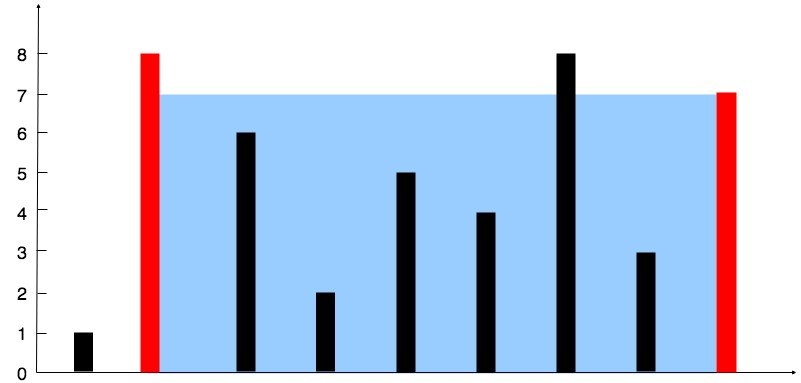

Example 1:


Input: height = [1,8,6,2,5,4,8,3,7]
Output: 49
Explanation: The above vertical lines are represented by array [1,8,6,2,5,4,8,3,7]. In this case, the max area of water (blue section) the container can contain is 49.
Example 2:

Input: height = [1,1]
Output: 1

# Intuition

1. Brute force: we iterate through each item of array as length of container. we iterate through each right item of array of length as breadth. we calculate the area of each possible combination. If the area is greater than the global maximum we update the global maximum and return the maximum

2. 2 pointer solution: Here we can see that in brute force we are using double loop . So we can use 2 pointer solution here. we assign leftmost index to array and we assign rightmost index to right. we calculate the area and assign max area if it is global max area. Then we increment left if height of right is more and decrement right if height of left is max. 

In [6]:
# Brute force

# def maxArea(height):
#         """
#         :type height: List[int]
#         :rtype: int
#         """
#         max_area=0
#         for l in range(len(height)):
#             for b in range(l+1,len(height)):
#                 area = min(height[l],height[b])*(b-l)
#                 max_area=max(area,max_area)
#         return max_area
                
# height = [1,8,6,2,5,4,8,3,7]
# maxArea(height)

# 2 pointer

def maxArea(height):
        """
        :type height: List[int]
        :rtype: int
        """
        max_area=0
        l,r = 0,len(height)-1
        while(l<r):
            area = (r-l)* min(height[l],height[r])
            max_area = max(max_area,area)
            
            if(height[l]<height[r]):
                l+=1
            elif(height[l]>height[r]):
                r-=1
            else:
                r-=1
        return max_area
                
height = [1,8,6,2,5,4,8,3,7]
maxArea(height)

49

# 5. Given n non-negative integers representing an elevation map where the width of each bar is 1, compute how much water it can trap after raining.

 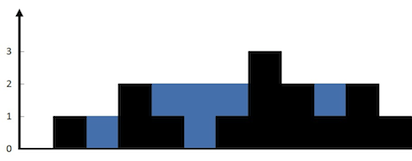

Example 1:


Input: height = [0,1,0,2,1,0,1,3,2,1,2,1]
Output: 6
Explanation: The above elevation map (black section) is represented by array [0,1,0,2,1,0,1,3,2,1,2,1]. In this case, 6 units of rain water (blue section) are being trapped.
Example 2:

Input: height = [4,2,0,3,2,5]
Output: 9
 

Constraints:

n == height.length
1 <= n <= 2 * 104
0 <= height[i] <= 105

# Intuition

1. Using extra memory: We will create 3 array: 1. max left 2. max right 3. min of both. we will iterate through the forward direction to calculate max left array. we find the max to left side of array and store it in the array. Similarly we create right max array by iterating in reverse direction. we find max to the right side of array and store it in max right of array. In the third array we store the min of both array array. Once the third array is calculated we iterate through the input array and 3rd array. We calculate 3rd array item - input array item. If the output is neg we neglect it otherwise we add the output to global water trap. Once we iterate through all the item we return the global water trapped. This solution requires O(n) for both time and space.

2. Using 2 pointer: We can reduce space complexity of earlier solution by using 2 pointers. We initialize left and right pointers. We store the initial values of max_left and max_right as the array index values. We compare max_left and max_right. If left is small we increment left pointer and if right is small we decrement right pointer. If left is small we update max_left with max of max_left and the current left heigh value and if right is small we update max_right with max of max_right and current right height value.  We then update result value with the difference of max_left/max_right - current pointer element.

In [2]:
# Code 

def trap(height):
        """
        :type height: List[int]
        :rtype: int
        """
        
        l,r = 0,len(height)-1
        max_l,max_r = height[l],height[r]
        res = 0
        while(l<r):
            if max_l < max_r:
                l+=1
                max_l = max(max_l,height[l])
                res+=max_l-height[l]
            else:
                r-=1
                max_r = max(max_r,height[r])
                res+=max_r-height[r]
        return res
        
        
height = [0,1,0,2,1,0,1,3,2,1,2,1]
trap(height)

6

# Sliding Window problems

## 1. You are given an array prices where prices[i] is the price of a given stock on the ith day.

You want to maximize your profit by choosing a single day to buy one stock and choosing a different day in the future to sell that stock.

Return the maximum profit you can achieve from this transaction. If you cannot achieve any profit, return 0.

 

Example 1:

Input: prices = [7,1,5,3,6,4]
Output: 5
Explanation: Buy on day 2 (price = 1) and sell on day 5 (price = 6), profit = 6-1 = 5.
Note that buying on day 2 and selling on day 1 is not allowed because you must buy before you sell.
Example 2:

Input: prices = [7,6,4,3,1]
Output: 0
Explanation: In this case, no transactions are done and the max profit = 0.

## Intuition

2 pointer sliding window approach: we initialize l to 0 and r to 1. we initialize global profit to 0. Then we iterate until our right pointer reaches till the end. We compare the price of left and right pointer. If left pointer price is less than right pointer price we calculate the local profit and then store in global profit if it is greater than global profit and then increment r pointer. If left pointer price is greater than right pointer we assign value of right pointer to left pointer and increment right pointer. finally return global pointer

In [4]:
# Code
def maxProfit(prices):
        """
        :type prices: List[int]
        :rtype: int
        """
        l,r = 0,1
        global_profit=0
        length = len(prices)
        while(r<length):
            if prices[l]<prices[r]:
                local_profit = prices[r]-prices[l]
                global_profit = max(global_profit,local_profit)
                r+=1
            else:
                l=r
                r+=1
        return global_profit
        
        
prices = [7,6,4,3,1]
maxProfit(prices)

0

# 2. Longest Substring Without Repeating Characters
Medium
Topics
Companies
Given a string s, find the length of the longest 
substring
 without repeating characters.


Example 1:

Input: s = "abcabcbb"
Output: 3
Explanation: The answer is "abc", with the length of 3.
Example 2:

Input: s = "bbbbb"
Output: 1
Explanation: The answer is "b", with the length of 1.
Example 3:

Input: s = "pwwkew"
Output: 3
Explanation: The answer is "wke", with the length of 3.
Notice that the answer must be a substring, "pwke" is a subsequence and not a substring.

## Intuition

1. Iterate through each combination of substring and check if it has all distinct characters. If not we consider it as longest substring and return the length. but we check substring for all combinations so time complexity becomes O(n^2). 

2. Sliding window: We check if the elements in the sliding window is duplicate or not. If it is duplicate we remove that elemetn from our set. and we increment the left pointer. Then we add the right pointer element in our set. while we iterate through the right pointer we calculate the max length by comparing the max betweeen previous max and currenty by r-l+1. we use a set to check if the element is duplicate or not.

In [5]:
# Code
def lengthOfLongestSubstring(s):
        """
        :type s: str
        :rtype: int
        """
        l = 0
        set1 = set(s[l])
        max_len = 0
        
        for r in range(len(s)):
            while s[r] in set1:
                set1.remove(s[l])
                l+=1
            set1.add(s[r])
            max_len = max(max_len,r-l+1)
        return max_len
        
        
s = "abcabcbb"
lengthOfLongestSubstring(s)

3